# 1.1 기존의 프로그램 방식

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 섭씨온도(인풋 데이터)를 받아 화씨온도(target데이터)로 출력

In [3]:
def celsius_to_faherenheit(x):
    return x * 1.8 + 32

In [4]:
input_c = int(input('섭씨 온도는 ?'))
print("화씨온도는 ", celsius_to_faherenheit(input_c))

섭씨 온도는 ?10
화씨온도는  50.0


# 1.2 머신러닝 프로그램 방식
- 데이터 확보 및 생성
- 데이터 전처리 : 훈련데이터셋, 검증데이터셋, 시험데이터 셋,...
- 모델 구성
- 모델 학습과정 설정
- 모델 학습 시키기
- 모델 평가(시험데이터 셋으로)
- 모델 사용(입력값을 주어서 예측값을 받기)

In [5]:
# 1 데이터
data_C = np.array(range(100))
data_C # 입력값

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_F = celsius_to_faherenheit(data_C)
data_F # target 값

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense # 입력값과 출력값

In [8]:
# 3. 모델 구성
model = Sequential()
model.add(Dense(1, input_dim=1)) # input_dim=1:독립변수 1개, target데이터:1

# 4. 모델 학습과정 설정
model.compile(loss="mse", optimizer="rmsprop", metrics=['mae'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# 학습전 예측
print(model.predict([0]))

[[0.]]


In [10]:
model.save('model/before_learning.h5')

In [11]:
# 2. 컴퓨터에게 학습시키기 위해 normalize함(전체의 편차 줄이기. 이상적인 편차 0~1)
scaled_data_C = data_C/100.0
scaled_data_F = data_F/100.0
print(scaled_data_C, end="\n\n")
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]

[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76

In [12]:
# 4. 모델 학습시키기
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 1s - loss: 0.7210 - mae: 0.8009
Epoch 2/1000
4/4 - 0s - loss: 0.7025 - mae: 0.7898
Epoch 3/1000
4/4 - 0s - loss: 0.6897 - mae: 0.7823
Epoch 4/1000
4/4 - 0s - loss: 0.6777 - mae: 0.7751
Epoch 5/1000
4/4 - 0s - loss: 0.6672 - mae: 0.7686
Epoch 6/1000
4/4 - 0s - loss: 0.6570 - mae: 0.7625
Epoch 7/1000
4/4 - 0s - loss: 0.6464 - mae: 0.7560
Epoch 8/1000
4/4 - 0s - loss: 0.6358 - mae: 0.7495
Epoch 9/1000
4/4 - 0s - loss: 0.6261 - mae: 0.7434
Epoch 10/1000
4/4 - 0s - loss: 0.6174 - mae: 0.7378
Epoch 11/1000
4/4 - 0s - loss: 0.6078 - mae: 0.7317
Epoch 12/1000
4/4 - 0s - loss: 0.5988 - mae: 0.7260
Epoch 13/1000
4/4 - 0s - loss: 0.5900 - mae: 0.7202
Epoch 14/1000
4/4 - 0s - loss: 0.5808 - mae: 0.7144
Epoch 15/1000
4/4 - 0s - loss: 0.5718 - mae: 0.7084
Epoch 16/1000
4/4 - 0s - loss: 0.5624 - mae: 0.7023
Epoch 17/1000
4/4 - 0s - loss: 0.5532 - mae: 0.6960
Epoch 18/1000
4/4 - 0s - loss: 0.5451 - mae: 0.6905
Epoch 19/1000
4/4 - 0s - loss: 0.5373 - mae: 0.6853
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.0133 - mae: 0.0993
Epoch 159/1000
4/4 - 0s - loss: 0.0131 - mae: 0.0987
Epoch 160/1000
4/4 - 0s - loss: 0.0129 - mae: 0.0981
Epoch 161/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0972
Epoch 162/1000
4/4 - 0s - loss: 0.0125 - mae: 0.0965
Epoch 163/1000
4/4 - 0s - loss: 0.0123 - mae: 0.0958
Epoch 164/1000
4/4 - 0s - loss: 0.0121 - mae: 0.0949
Epoch 165/1000
4/4 - 0s - loss: 0.0119 - mae: 0.0941
Epoch 166/1000
4/4 - 0s - loss: 0.0117 - mae: 0.0934
Epoch 167/1000
4/4 - 0s - loss: 0.0115 - mae: 0.0926
Epoch 168/1000
4/4 - 0s - loss: 0.0114 - mae: 0.0920
Epoch 169/1000
4/4 - 0s - loss: 0.0112 - mae: 0.0911
Epoch 170/1000
4/4 - 0s - loss: 0.0111 - mae: 0.0904
Epoch 171/1000
4/4 - 0s - loss: 0.0109 - mae: 0.0898
Epoch 172/1000
4/4 - 0s - loss: 0.0107 - mae: 0.0892
Epoch 173/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0885
Epoch 174/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0878
Epoch 175/1000
4/4 - 0s - loss: 0.0101 - mae: 0.0869
Epoch 176/1000
4/4 - 0s - loss: 0.0099 - mae: 

Epoch 307/1000
4/4 - 0s - loss: 2.5503e-07 - mae: 4.9190e-04
Epoch 308/1000
4/4 - 0s - loss: 8.1619e-07 - mae: 8.8170e-04
Epoch 309/1000
4/4 - 0s - loss: 8.1232e-07 - mae: 8.7590e-04
Epoch 310/1000
4/4 - 0s - loss: 1.3913e-07 - mae: 3.6628e-04
Epoch 311/1000
4/4 - 0s - loss: 5.3454e-07 - mae: 7.0577e-04
Epoch 312/1000
4/4 - 0s - loss: 1.0766e-06 - mae: 0.0010
Epoch 313/1000
4/4 - 0s - loss: 3.2767e-07 - mae: 5.3086e-04
Epoch 314/1000
4/4 - 0s - loss: 2.8632e-07 - mae: 5.1668e-04
Epoch 315/1000
4/4 - 0s - loss: 9.8864e-07 - mae: 9.6820e-04
Epoch 316/1000
4/4 - 0s - loss: 4.1653e-07 - mae: 6.3260e-04
Epoch 317/1000
4/4 - 0s - loss: 3.0708e-07 - mae: 5.4045e-04
Epoch 318/1000
4/4 - 0s - loss: 1.0116e-06 - mae: 9.8479e-04
Epoch 319/1000
4/4 - 0s - loss: 6.3060e-07 - mae: 7.7120e-04
Epoch 320/1000
4/4 - 0s - loss: 3.1639e-07 - mae: 5.4910e-04
Epoch 321/1000
4/4 - 0s - loss: 6.5775e-07 - mae: 7.9192e-04
Epoch 322/1000
4/4 - 0s - loss: 4.3046e-07 - mae: 6.4394e-04
Epoch 323/1000
4/4 - 0s - lo

Epoch 443/1000
4/4 - 0s - loss: 3.7603e-08 - mae: 1.8609e-04
Epoch 444/1000
4/4 - 0s - loss: 5.0552e-07 - mae: 6.5227e-04
Epoch 445/1000
4/4 - 0s - loss: 1.1565e-06 - mae: 0.0011
Epoch 446/1000
4/4 - 0s - loss: 9.8905e-08 - mae: 2.8819e-04
Epoch 447/1000
4/4 - 0s - loss: 5.8997e-07 - mae: 7.4140e-04
Epoch 448/1000
4/4 - 0s - loss: 1.0698e-06 - mae: 9.8079e-04
Epoch 449/1000
4/4 - 0s - loss: 2.6131e-07 - mae: 4.9903e-04
Epoch 450/1000
4/4 - 0s - loss: 3.7922e-07 - mae: 5.9690e-04
Epoch 451/1000
4/4 - 0s - loss: 1.1520e-06 - mae: 0.0010
Epoch 452/1000
4/4 - 0s - loss: 2.5694e-07 - mae: 4.9562e-04
Epoch 453/1000
4/4 - 0s - loss: 5.7997e-07 - mae: 7.4525e-04
Epoch 454/1000
4/4 - 0s - loss: 8.0878e-07 - mae: 8.8153e-04
Epoch 455/1000
4/4 - 0s - loss: 5.1258e-07 - mae: 7.0008e-04
Epoch 456/1000
4/4 - 0s - loss: 7.1940e-07 - mae: 8.2963e-04
Epoch 457/1000
4/4 - 0s - loss: 4.0611e-07 - mae: 6.2521e-04
Epoch 458/1000
4/4 - 0s - loss: 6.8886e-07 - mae: 8.0766e-04
Epoch 459/1000
4/4 - 0s - loss: 

Epoch 579/1000
4/4 - 0s - loss: 2.8824e-08 - mae: 1.5727e-04
Epoch 580/1000
4/4 - 0s - loss: 2.3045e-07 - mae: 4.5379e-04
Epoch 581/1000
4/4 - 0s - loss: 9.7730e-07 - mae: 9.3647e-04
Epoch 582/1000
4/4 - 0s - loss: 3.4883e-07 - mae: 5.6179e-04
Epoch 583/1000
4/4 - 0s - loss: 9.2862e-07 - mae: 9.4345e-04
Epoch 584/1000
4/4 - 0s - loss: 4.1456e-07 - mae: 6.3254e-04
Epoch 585/1000
4/4 - 0s - loss: 2.4207e-07 - mae: 4.7957e-04
Epoch 586/1000
4/4 - 0s - loss: 7.6191e-07 - mae: 8.4780e-04
Epoch 587/1000
4/4 - 0s - loss: 5.9448e-07 - mae: 7.5703e-04
Epoch 588/1000
4/4 - 0s - loss: 3.2419e-07 - mae: 5.5555e-04
Epoch 589/1000
4/4 - 0s - loss: 6.4311e-07 - mae: 7.7829e-04
Epoch 590/1000
4/4 - 0s - loss: 6.2928e-07 - mae: 7.7842e-04
Epoch 591/1000
4/4 - 0s - loss: 9.1482e-07 - mae: 9.2505e-04
Epoch 592/1000
4/4 - 0s - loss: 3.0053e-07 - mae: 5.3637e-04
Epoch 593/1000
4/4 - 0s - loss: 4.4842e-07 - mae: 6.4957e-04
Epoch 594/1000
4/4 - 0s - loss: 6.7831e-07 - mae: 8.0370e-04
Epoch 595/1000
4/4 - 0s 

Epoch 715/1000
4/4 - 0s - loss: 9.9367e-07 - mae: 7.9427e-04
Epoch 716/1000
4/4 - 0s - loss: 7.5988e-09 - mae: 6.8372e-05
Epoch 717/1000
4/4 - 0s - loss: 5.9382e-09 - mae: 6.4345e-05
Epoch 718/1000
4/4 - 0s - loss: 9.7187e-08 - mae: 2.7949e-04
Epoch 719/1000
4/4 - 0s - loss: 1.8777e-06 - mae: 0.0013
Epoch 720/1000
4/4 - 0s - loss: 2.4727e-07 - mae: 4.8045e-04
Epoch 721/1000
4/4 - 0s - loss: 1.0366e-07 - mae: 3.1525e-04
Epoch 722/1000
4/4 - 0s - loss: 4.2641e-07 - mae: 6.0566e-04
Epoch 723/1000
4/4 - 0s - loss: 1.3833e-06 - mae: 0.0011
Epoch 724/1000
4/4 - 0s - loss: 3.1370e-07 - mae: 5.4657e-04
Epoch 725/1000
4/4 - 0s - loss: 1.0105e-07 - mae: 3.0554e-04
Epoch 726/1000
4/4 - 0s - loss: 3.5301e-07 - mae: 5.4809e-04
Epoch 727/1000
4/4 - 0s - loss: 1.6996e-06 - mae: 0.0012
Epoch 728/1000
4/4 - 0s - loss: 1.2972e-07 - mae: 3.4536e-04
Epoch 729/1000
4/4 - 0s - loss: 9.6764e-08 - mae: 2.9809e-04
Epoch 730/1000
4/4 - 0s - loss: 9.3489e-07 - mae: 9.3982e-04
Epoch 731/1000
4/4 - 0s - loss: 1.31

Epoch 851/1000
4/4 - 0s - loss: 3.5266e-07 - mae: 5.1069e-04
Epoch 852/1000
4/4 - 0s - loss: 2.0121e-06 - mae: 0.0012
Epoch 853/1000
4/4 - 0s - loss: 1.3889e-08 - mae: 1.1185e-04
Epoch 854/1000
4/4 - 0s - loss: 1.9158e-08 - mae: 1.3527e-04
Epoch 855/1000
4/4 - 0s - loss: 2.1396e-07 - mae: 4.1176e-04
Epoch 856/1000
4/4 - 0s - loss: 1.7890e-06 - mae: 0.0013
Epoch 857/1000
4/4 - 0s - loss: 2.5098e-07 - mae: 4.8073e-04
Epoch 858/1000
4/4 - 0s - loss: 6.4709e-08 - mae: 2.4677e-04
Epoch 859/1000
4/4 - 0s - loss: 1.0155e-06 - mae: 9.7856e-04
Epoch 860/1000
4/4 - 0s - loss: 3.6889e-07 - mae: 5.9451e-04
Epoch 861/1000
4/4 - 0s - loss: 3.8986e-07 - mae: 6.1228e-04
Epoch 862/1000
4/4 - 0s - loss: 3.6624e-07 - mae: 5.7099e-04
Epoch 863/1000
4/4 - 0s - loss: 7.4475e-07 - mae: 8.2223e-04
Epoch 864/1000
4/4 - 0s - loss: 6.4638e-07 - mae: 7.9136e-04
Epoch 865/1000
4/4 - 0s - loss: 3.4197e-07 - mae: 5.7159e-04
Epoch 866/1000
4/4 - 0s - loss: 1.1373e-06 - mae: 0.0010
Epoch 867/1000
4/4 - 0s - loss: 7.69

Epoch 987/1000
4/4 - 0s - loss: 2.0157e-07 - mae: 4.2611e-04
Epoch 988/1000
4/4 - 0s - loss: 1.7071e-06 - mae: 0.0013
Epoch 989/1000
4/4 - 0s - loss: 1.3821e-07 - mae: 3.5952e-04
Epoch 990/1000
4/4 - 0s - loss: 1.7423e-07 - mae: 4.0153e-04
Epoch 991/1000
4/4 - 0s - loss: 1.2672e-06 - mae: 0.0011
Epoch 992/1000
4/4 - 0s - loss: 5.6138e-07 - mae: 7.0310e-04
Epoch 993/1000
4/4 - 0s - loss: 2.3112e-07 - mae: 4.6967e-04
Epoch 994/1000
4/4 - 0s - loss: 3.2773e-07 - mae: 5.4919e-04
Epoch 995/1000
4/4 - 0s - loss: 7.8651e-07 - mae: 8.6581e-04
Epoch 996/1000
4/4 - 0s - loss: 1.1085e-06 - mae: 0.0010
Epoch 997/1000
4/4 - 0s - loss: 7.9227e-09 - mae: 7.1887e-05
Epoch 998/1000
4/4 - 0s - loss: 1.1252e-08 - mae: 9.2498e-05
Epoch 999/1000
4/4 - 0s - loss: 7.4825e-07 - mae: 7.6815e-04
Epoch 1000/1000
4/4 - 0s - loss: 1.1194e-06 - mae: 9.9584e-04


In [13]:
hist.history.keys()

dict_keys(['loss', 'mae'])

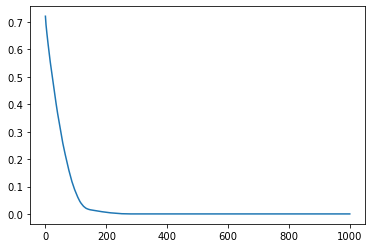

In [14]:
plt.plot(hist.history['loss'])
plt.show()

In [15]:
model.predict([0.01])

array([[0.33828226]], dtype=float32)

In [16]:
model.save('model/after_learning.h5')

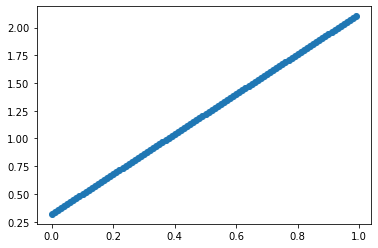

In [17]:
plt.scatter(x=scaled_data_C, y=scaled_data_F)

# 1.3 노이즈가 있는 데이터로 실습

In [ ]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(703)
noise = np.array(np.random.normal(0, 0.1, 100))
nosied_scaled_data_F = scaled_data_F + noise